Import des Librairies

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn import linear_model
from sklearn.model_selection import train_test_split

# pour la cross validation:
    # pour le tri du jeu d'entrainement
from sklearn.model_selection import KFold # partage le set en n groupes de manière aléatoire 
from sklearn.model_selection import LeaveOneOut # le jeu va être validé sur un seul individu => temps de calculs très long
from sklearn.model_selection import ShuffleSplit # idem KFold sauf que le jeu va être mélanger aprés chaque validation
from sklearn.model_selection import StratifiedKFold # permet de faire des groupes homogènes contenent chacun la même proportion de chaque variables
from sklearn.model_selection import GroupKFold # si une variable est catégorielle => avoir autant de chaque catégorie exemple autant de 1er classe que de 2nd classe
    # pour réaliser le tri sur le jeu d'entrainement et des variables simplement
from sklearn.model_selection import GridSearchCV 

# pour obtenir le score d'un model
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

# pour la vaildation curve
from sklearn.model_selection import validation_curve # permet de visualiser les résultats avec les différents hyperparamètres

from sklearn.metrics import r2_score, mean_squared_error
# pour la learning curve
from sklearn.model_selection import learning_curve # permet de savoir s'il y a assez de données ou si plus de données donneraient une meilleure performance

Chargement du Dataset

In [5]:
data = pd.read_csv('possum.csv')
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Nettoyage

In [6]:
# Suppression de colonnes inutiles
data.drop(['case','site','Pop','sex'], axis=1, inplace=True)
data.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [7]:
#data.info()
print(data.isnull().sum())

age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


In [8]:
# On note quelques valeurs manquantes qu'il faut remplacer
# Remplacer en utilisant la médiane
median = data['footlgth'].median()
data['footlgth'].fillna(median, inplace=True)

median = data['age'].median()
data['age'].fillna(median, inplace=True)

data.isnull().sum()

age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [9]:
# On vérifie que nous n'avons pas de doublon
data[data.duplicated()]

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


Analyse Exploratoire des données

Visualisation Numérique

In [10]:
data.describe()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,3.817308,92.602885,56.883654,87.088462,37.009615,68.454808,48.130769,15.046154,27.000000,32.586538
std,1.894112,3.573349,3.113426,4.310549,1.959518,4.374149,4.109380,1.050374,2.045597,2.761949
min,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,2.750000,90.675000,54.975000,84.000000,35.875000,64.650000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


<strong><em><h5>

<ul>

<li>Age : la moyenne d'age est d'environ 4 ans réparti entre 1 et 9 ans</li>

<li>tail : la taille moyenne est de 37cm réparti entre 32.000 et 43 cm</li>

<li>chest : La taille moyenne de la poitrine est de 27cm repartie entre 22 et 32 cm</li>

</ul></h5></em></strong>

# Visualisation Graphique

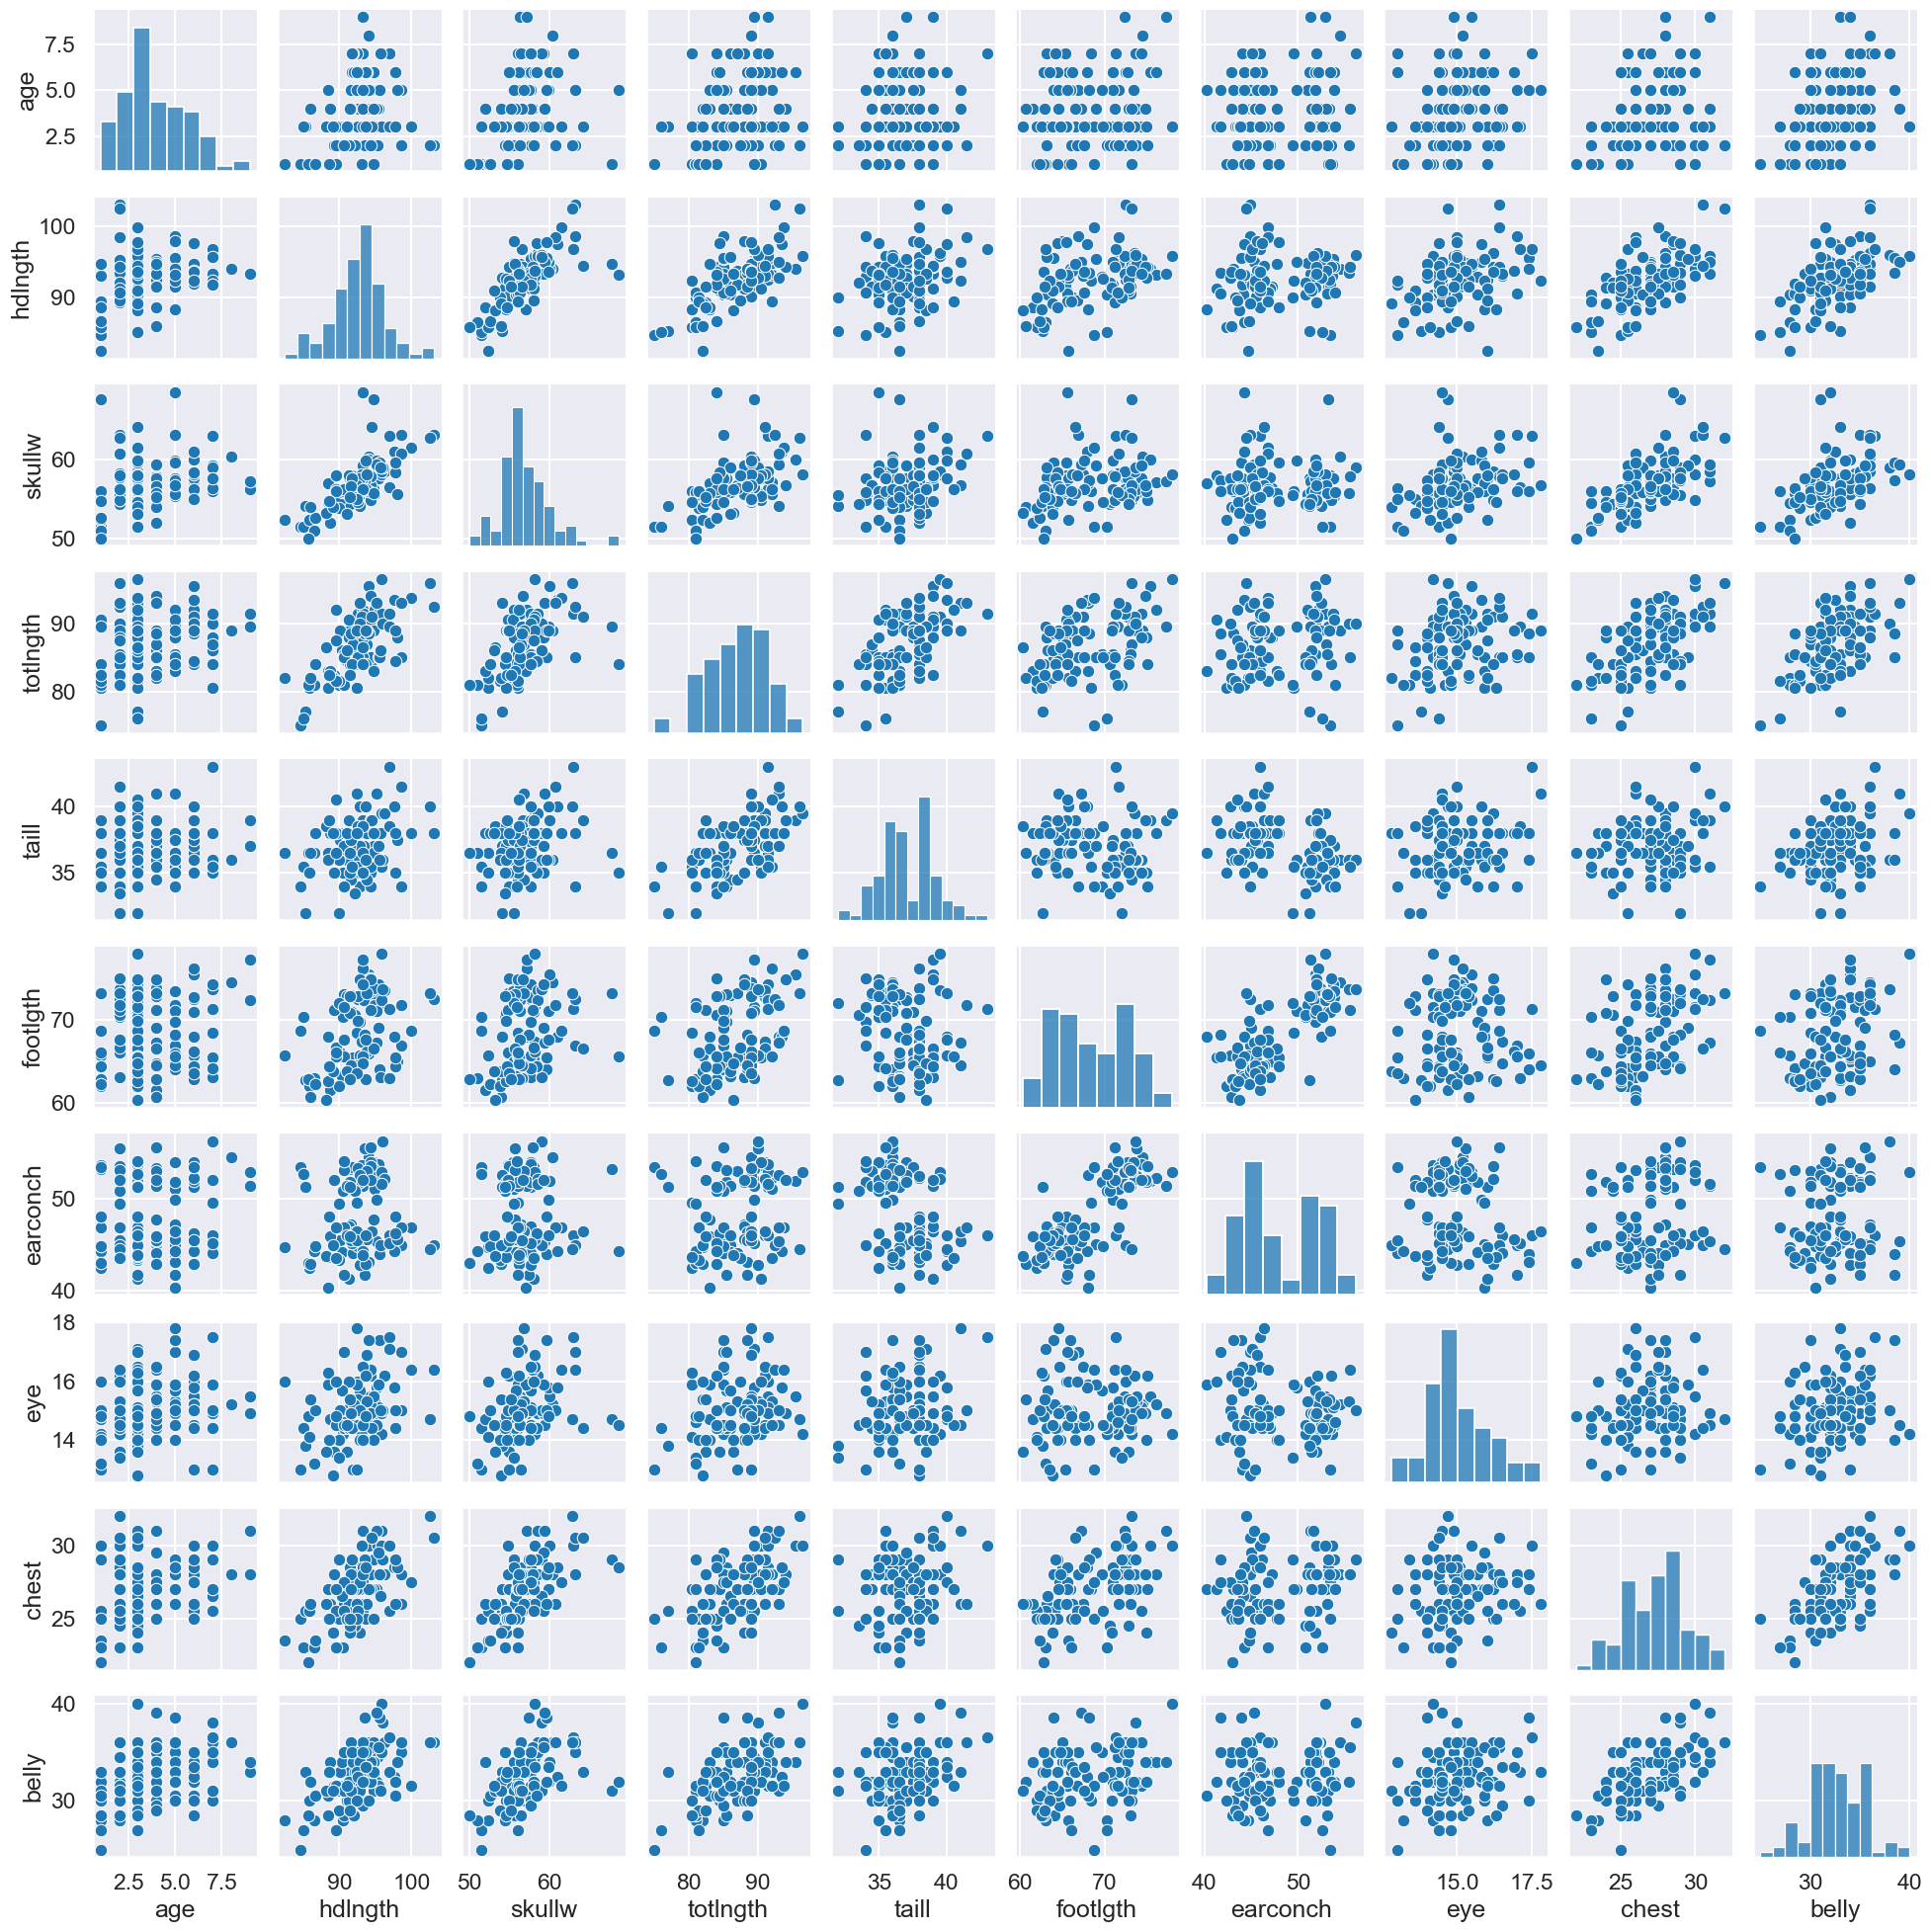

In [11]:
#data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
sns.pairplot(data,height=2)

In [12]:
# La plupart des features ont une relation linéaire avec la sortie

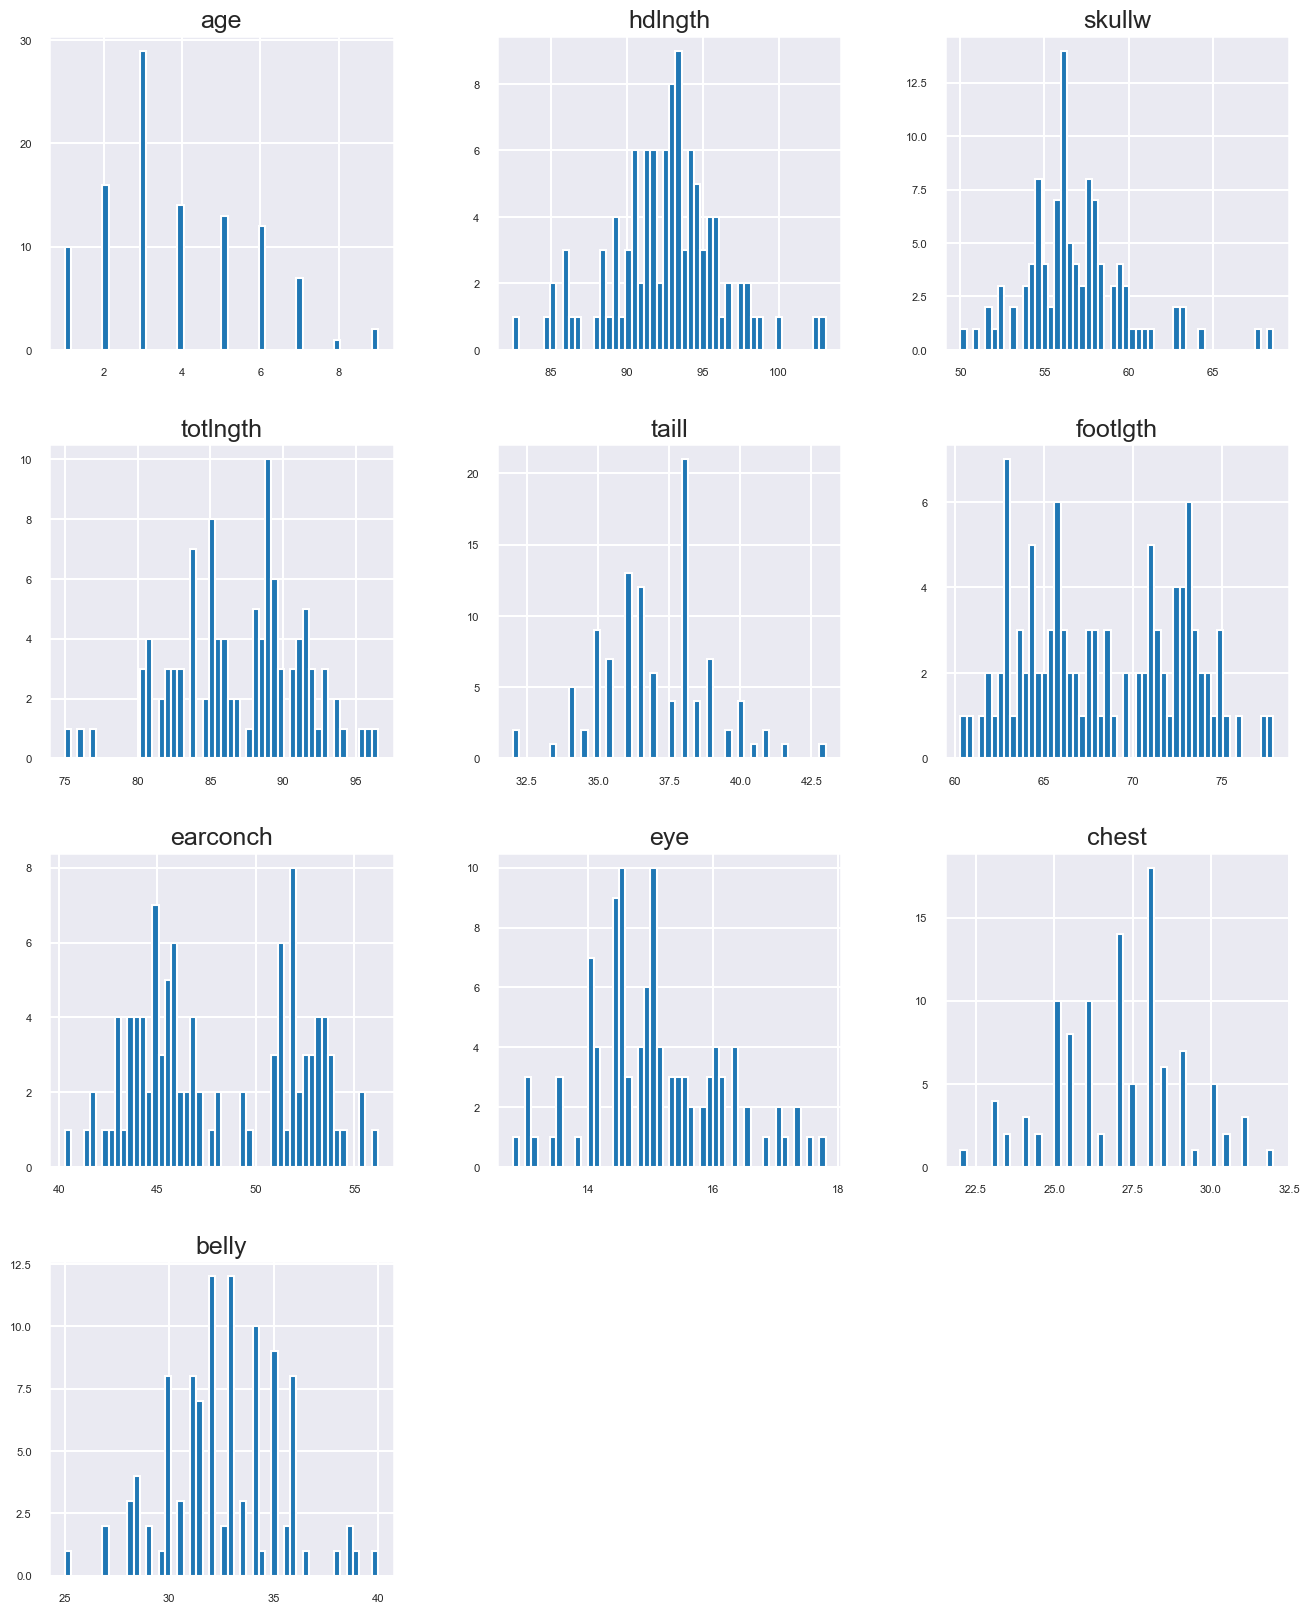

In [13]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [14]:
# On note une distribution normale des données

# Correlations

[]

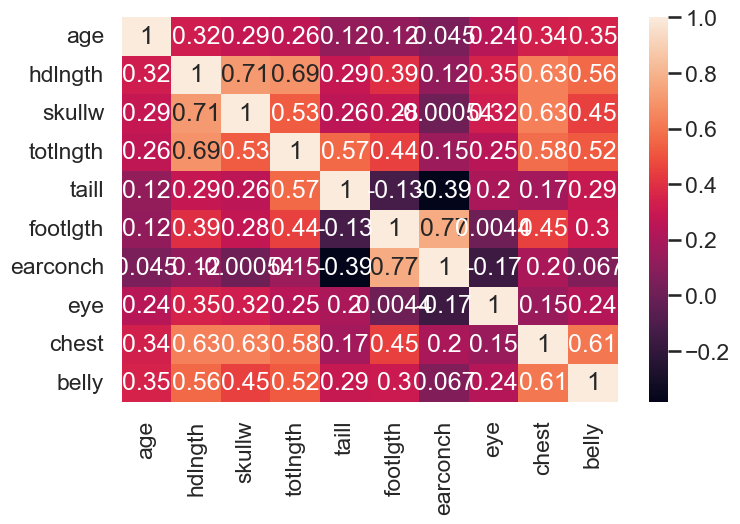

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True)
plt.plot()

In [16]:
""" 
La carte des correlations nous montre une liaison entre l'âge et les suivants: chest, belly, totlngth, skullw et hdlngth
Nous retiendrons donc les variables suivantes pour la suite de notre étude: age, chest, belly, totlngth, skullw et hdlngth
"""

" \nLa carte des correlations nous montre une liaison entre l'âge et les suivants: chest, belly, totlngth, skullw et hdlngth\nNous retiendrons donc les variables suivantes pour la suite de notre étude: age, chest, belly, totlngth, skullw et hdlngth\n"

In [17]:
col = ['age','chest','belly','totlngth','skullw','hdlngth']
df = data[col]
median = data['age'].median()
data['age'].fillna(median, inplace=True)
df.head()

,age,chest,belly,totlngth,skullw,hdlngth
0,8.0,28.0,36.0,89.0,60.4,94.1
1,6.0,28.5,33.0,91.5,57.6,92.5
2,6.0,30.0,34.0,95.5,60.0,94.0
3,6.0,28.0,34.0,92.0,57.1,93.2
4,2.0,28.5,33.0,85.5,56.3,91.5


# Détecter et gerer les outliers

<AxesSubplot: >

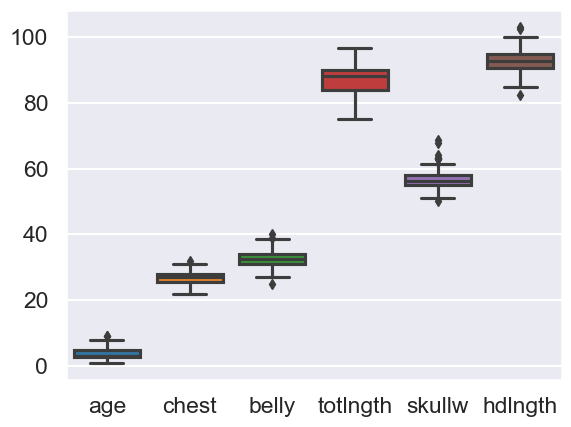

In [18]:
sns.boxplot(data = df)

In [19]:
# On note quelques valeurs abérrantes à supprimer

features = ['age','chest','belly','totlngth','skullw','hdlngth']

def impute_outliers(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75) 
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

In [20]:
for feature in features:
    impute_outliers(df, feature)

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_16708\3347265978.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[feature] < lower_bound, feature] = lower_bound
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_16708\3347265978.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[feature] > upper_bound, feature] = upper_bound


<AxesSubplot: >

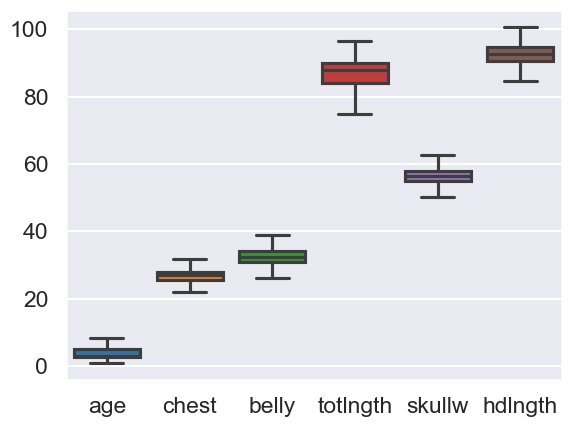

In [21]:
sns.boxplot(data = df)

# Traintest - Nettoyage

In [22]:
# Suppression de colonnes inutiles
df = pd.read_csv('possum_save.csv')
df.head()
df.drop(['case','site','Pop','sex'], axis=1, inplace=True)

In [23]:
print(df.isnull().sum())

age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


In [24]:
# On note quelques valeurs manquantes qu'il faut remplacer
# Remplacer en utilisant la médiane
median = df['footlgth'].median()
df['footlgth'].fillna(median, inplace=True)

median = df['age'].median()
df['age'].fillna(median, inplace=True)

In [25]:
# Nous n'avons pas d'encodage à faire
for col in df.select_dtypes('object'):
    print(f"{col:-<50} {df[col].unique()}")

# Decoupage du dataset

In [26]:
X = df.drop('age', axis = 1)

y = df['age']

seed = 1111

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

# KNeighborsClassifier

In [27]:
k_range = range(1,50)
scores = {}
scores_list = []

In [28]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

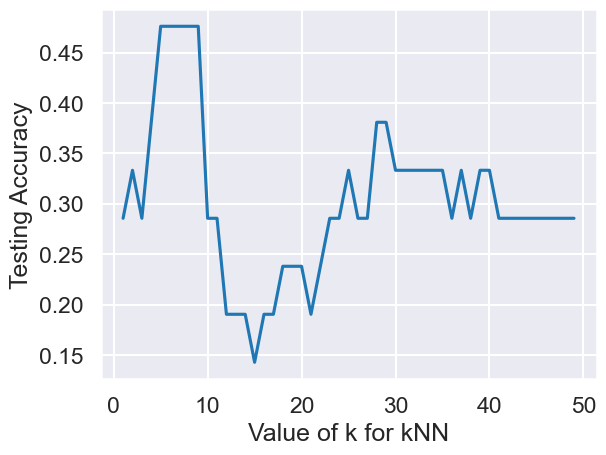

In [29]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of k for kNN')
plt.ylabel('Testing Accuracy')

In [30]:
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=42)

# Test

In [31]:
#X_test = [[2,4],[5,1]]
y_predict = knn.predict(X_test)
acc_test = knn.score(X_test,y_test)
print("acc Test:",acc_test)

print("prediction for values:")
print(f"{X_test.iloc[[9]]}   is:",y_predict[9])
#print("prediction for values:",X_test.iloc[[1]],"is: ",y_predict[1])
        

acc Test: 0.2857142857142857
prediction for values:
   hdlngth  skullw  totlngth  taill  footlgth  earconch   eye  chest  belly
6     95.3    58.2      89.5   36.0      71.5      52.0  14.2   30.0   34.5   is: 3.0


# Appliquons le scaler

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=42)

In [34]:
#X_test = [[2,4],[5,1]]
y_predict = knn.predict(X_test)
acc_test = knn.score(X_test,y_test)
print("acc Test:",acc_test)

print("prediction for values:")
print(f"{X_test[[9]]}   is:",y_predict[9])
#print("prediction for values:",X_test.iloc[[1]],"is: ",y_predict[1])

acc Test: 0.2857142857142857
prediction for values:
[[0.57608696 0.44086022 0.6744186  0.42105263 0.62790698 0.73584906
  0.30434783 0.88888889 0.63333333]]   is: 3.0


In [35]:
# On a le même résultat qu'avant la normalisation

# Regression Linéaire 

In [36]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [37]:
# Entrainemeent
y_pred = reg.predict(X_test)

In [38]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

2.0056707430850587

In [39]:
r2_score(y_test, y_pred)

-0.22515011891112624

# Appliquons Scaler

In [40]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [42]:
# Entrainemeent
y_pred = reg.predict(X_test)

In [43]:
math.sqrt(mean_squared_error(y_test, y_pred))

2.0056707430850587

In [44]:
r2_score(y_test, y_pred)

-0.22515011891112602

In [45]:
# On a le même résultat qu'avant la normalisation

# Selection des meilleurs variables

In [46]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest
# Calculons les différentes  variances
X.var(axis = 0)

hdlngth     12.768827
skullw       9.693420
totlngth    18.580836
taill        3.839712
footlgth    19.133181
earconch    16.887005
eye          1.103286
chest        4.184466
belly        7.628361
dtype: float64

In [47]:
# Filtrage des variables avec le seuil de 0.2
selector = VarianceThreshold(threshold = 8)
selector.fit_transform(X)
selector.get_support()

array([ True,  True,  True, False,  True,  True, False, False, False])

In [48]:
# Liste des variables selectionnées
cols = ['age','hdlngth','skullw','taill','footlgth']

df = df[cols]
df.head()

,age,hdlngth,skullw,taill,footlgth
0,8.0,94.1,60.4,36.0,74.5
1,6.0,92.5,57.6,36.5,72.5
2,6.0,94.0,60.0,39.0,75.4
3,6.0,93.2,57.1,38.0,76.1
4,2.0,91.5,56.3,36.0,71.0


# KNN

In [49]:
X = df.drop('age', axis = 1)

y = df['age']

seed = 1111

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [50]:
k_range = range(1,50)
scores = {}
scores_list = []

In [51]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

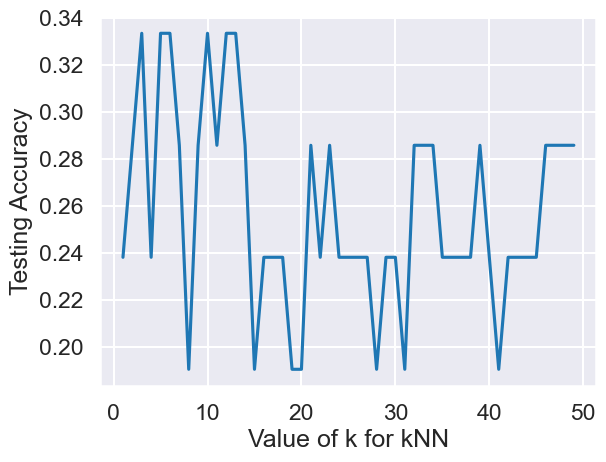

In [52]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of k for kNN')
plt.ylabel('Testing Accuracy')

In [53]:
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=45)

In [54]:
y_predict = knn.predict(X_test)
acc_test = knn.score(X_test,y_test)
print("acc Test:",acc_test)

acc Test: 0.23809523809523808


In [55]:
# Avec KNN on note une chute du score au lieu d'une hausse avec les meilleurs variables

# Regression Lineaire

In [56]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [57]:
# Entrainemeent
y_pred = reg.predict(X_test)

In [58]:
math.sqrt(mean_squared_error(y_test, y_pred))

1.959581798189624

In [59]:
r2_score(y_test, y_pred)

-0.1694908310041927

In [60]:
# On note une amelioration avec après selection des meilleurs variables

# Regression Polynômiale

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = seed)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)


LinearRegression()

In [78]:
X_train.iloc[0,:]

hdlngth     88.7
skullw      52.0
taill       38.0
footlgth    61.5
Name: 73, dtype: float64

In [79]:
X_poly_train[0,:]

array([1.00000e+00, 8.87000e+01, 5.20000e+01, 3.80000e+01, 6.15000e+01,
       7.86769e+03, 4.61240e+03, 3.37060e+03, 5.45505e+03, 2.70400e+03,
       1.97600e+03, 3.19800e+03, 1.44400e+03, 2.33700e+03, 3.78225e+03])

In [83]:
61.5**2

3782.25

In [62]:
X_poly

array([[1.00000e+00, 9.41000e+01, 6.04000e+01, ..., 1.29600e+03,
        2.68200e+03, 5.55025e+03],
       [1.00000e+00, 9.25000e+01, 5.76000e+01, ..., 1.33225e+03,
        2.64625e+03, 5.25625e+03],
       [1.00000e+00, 9.40000e+01, 6.00000e+01, ..., 1.52100e+03,
        2.94060e+03, 5.68516e+03],
       ...,
       [1.00000e+00, 9.24000e+01, 5.50000e+01, ..., 1.44400e+03,
        2.41300e+03, 4.03225e+03],
       [1.00000e+00, 9.15000e+01, 5.52000e+01, ..., 1.33225e+03,
        2.29585e+03, 3.95641e+03],
       [1.00000e+00, 9.36000e+01, 5.99000e+01, ..., 1.60000e+03,
        2.70400e+03, 4.56976e+03]])

In [73]:
# Prediction 
lin_reg_2.predict(X_poly_test)
X_new_datatest=np.array([[2,90,37,72]])
x_poly_newdatatest=poly_reg.fit_transform(X_new_datatest)

In [74]:
x_poly_newdatatest

array([[1.000e+00, 2.000e+00, 9.000e+01, 3.700e+01, 7.200e+01, 4.000e+00,
        1.800e+02, 7.400e+01, 1.440e+02, 8.100e+03, 3.330e+03, 6.480e+03,
        1.369e+03, 2.664e+03, 5.184e+03]])

In [85]:
lin_reg_2.predict(x_poly_newdatatest)

array([-203.05899883])